# Feeder Data Statistical Analysis

This is severely limited by T&TEC's data. The exploration was guided by the approach taken by <a href="https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python">Banerjee</a> in analysing time-series.

# Setup

In [4]:
!pip install pandas_profiling

  Using cached pandas_profiling-3.5.0-py2.py3-none-any.whl (325 kB)
     ---------------------------------------- 2.1/2.1 MB 6.5 MB/s eta 0:00:00
  Using cached typeguard-2.13.3-py3-none-any.whl (17 kB)
     ------------------------------------- 685.8/685.8 kB 42.2 MB/s eta 0:00:00
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached multimethod-1.9-py3-none-any.whl (10 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached tangled_up_in_unicode-0.2.0-py3-none-any.whl (4.7 MB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=0bda139315f2f0b629429c1777bbbb0f29764a59ca0529b67b253cd53c5fd387
  Stored in directory: c:\users\shankar ramharack\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [22]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

%matplotlib inline

In [14]:
df = pd.read_csv('../data/arganguez_feeder_data.csv')
df['Timestamp'] = pd.to_datetime(df.pop('Timestamp'))
df.set_index('Timestamp',inplace=True)
df.drop(['Times'],inplace=True,axis=1)
df.head()

,S total_SJN,P total_SJN,Q total_SJN,pf total_SJN
Timestamp,,,,
2016-02-25 08:45:00,12681.963,12242.791,3308.515,0.965
2016-02-25 08:30:00,12220.026,11800.326,3175.114,0.966
2016-02-25 08:15:00,12211.772,11787.791,3189.885,0.965
2016-02-25 08:00:00,11806.309,11435.935,2933.994,0.969
2016-02-25 07:45:00,11728.820,11377.988,2847.211,0.970


# Data Profiling

In [16]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Time Series Analysis

The below code analyzes the time-series for periodicity, trend and seasonality to determine if there is significant volatility as well as what trends are common so they can be used to develop representative feeder base loads. An investigation into the anomalies of the dataset is not done since the data appears clean at first glance.

## Behaviour over different intervals

The data is plotted over the course of the months and then weeks below.

In [38]:
def plot_df(df, y, title="", xlabel='Date', ylabel='Magnitude', dpi=150):
    plt.figure(figsize=(12,4), dpi=dpi)
    plt.plot(y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

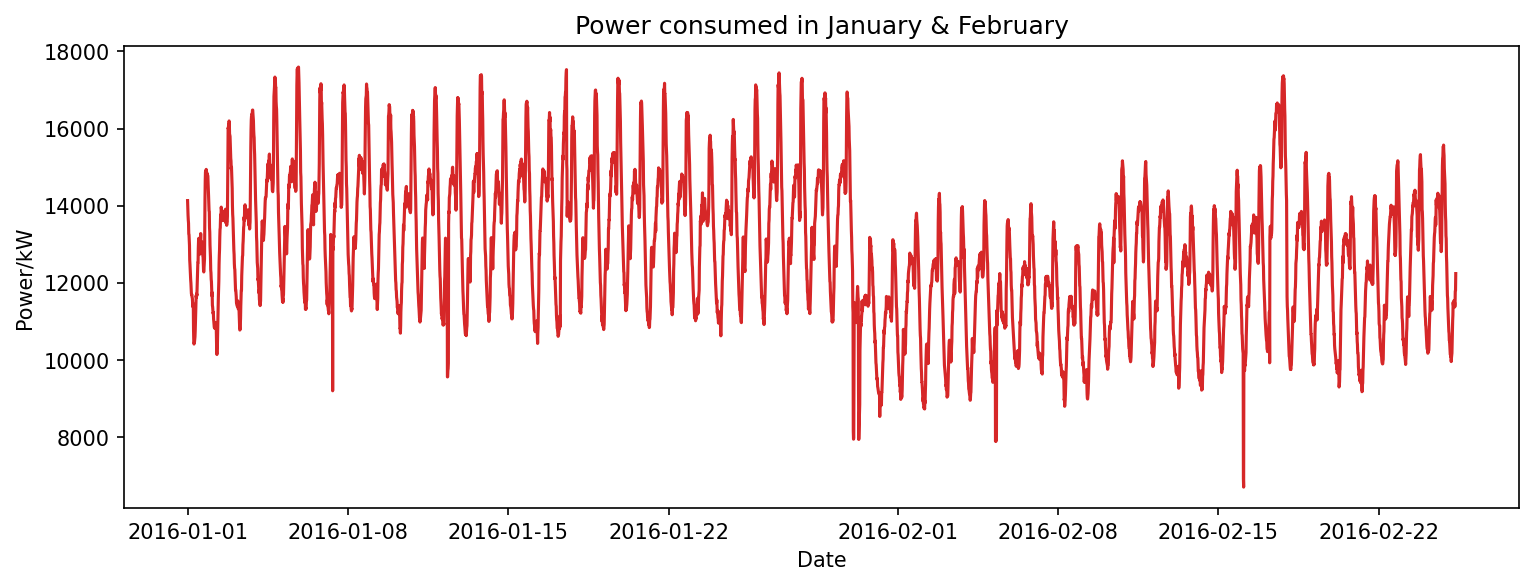

In [39]:
plot_df(df, y=df['P total_SJN'], title='Power consumed in January & February',ylabel='Power/kW')

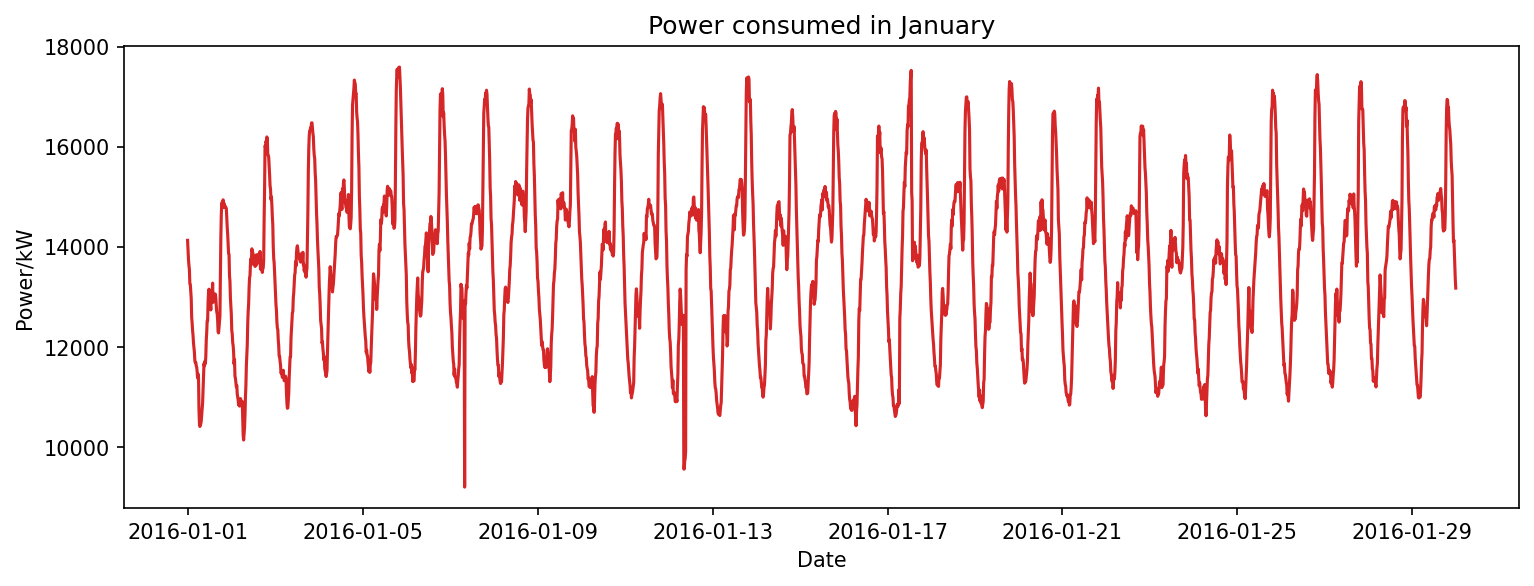

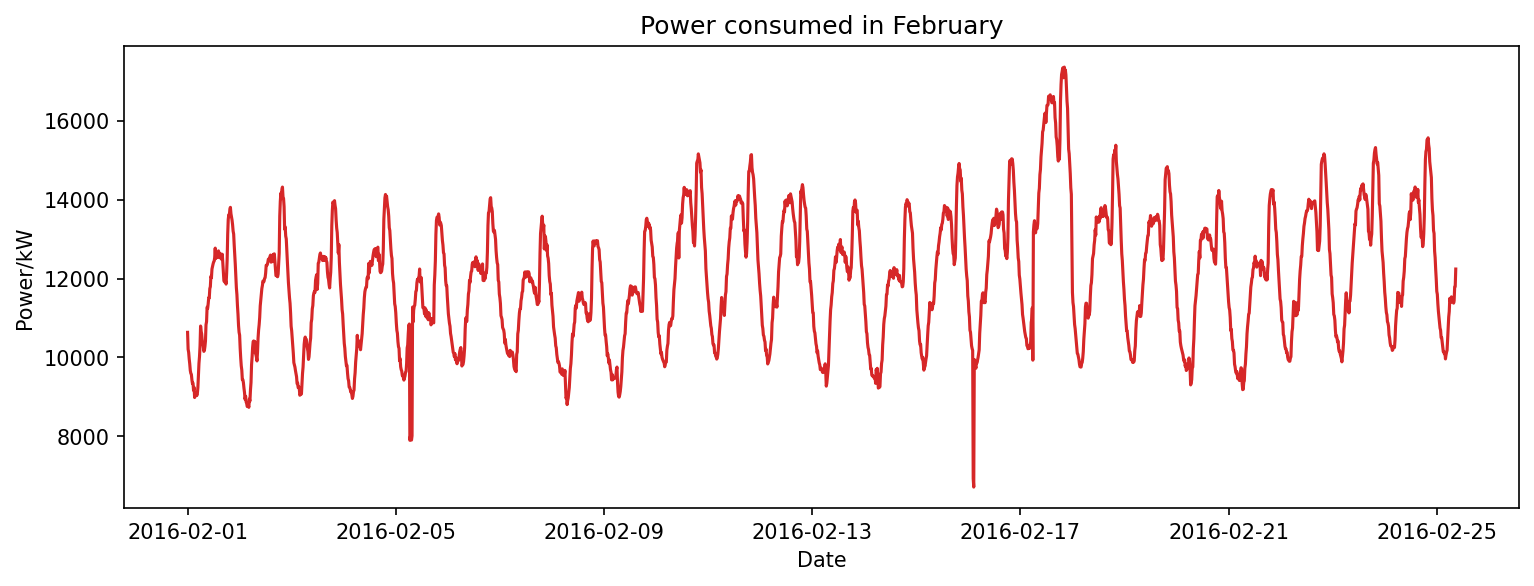

In [40]:
plot_df(df, y=df['P total_SJN']['2016-01-01':'2016-01-29'], title='Power consumed in January',ylabel='Power/kW')
plot_df(df, y=df['P total_SJN']['2016-02-01':], title='Power consumed in February',ylabel='Power/kW')

From the above, the data seems to have a noticeable drop transitioning from January to February. It appears that the data is cyclostationary or possibly seasonal in nature. However, further investigation is needed. It would be interesting to see how the data varies weekly as well.

In [ ]:
#